In [1]:
%matplotlib inline

import numpy
import pandas as pd
import matplotlib as matplot 
import seaborn

In [2]:
data = pd.read_csv('/home/surajr/Downloads/Crimes_2012-2015.csv',parse_dates={"ArrestDateTime":["DATE.OCC","TIME.OCC"]})

In [3]:
def converttodate():
    new=[]
    toconvert = data["ArrestDateTime"]
    for a in toconvert:
        obj = a.split(" ")   
        time = str(obj[1])
        if len(time)==4:
            time = time[:2]+':'+time[2:]         
            new.append(obj[0]+" "+time)
        elif len(time)==3:
            time = '0'+time[:1]+':'+time[1:]         
            new.append(obj[0]+" "+time)
        elif len(time)==2:        
            time = '0'+time[0]+':'+time[0:]
            new.append(obj[0]+" "+time)        
        else:
            time = time+'0:00'
            new.append(obj[0]+" "+time)
        
    return new

In [4]:
newArrestDateTime = converttodate()
data = data.drop("ArrestDateTime", axis=1)
data["ArrestDateTime"] = newArrestDateTime

In [5]:
data.head()

,Date.Rptd,DR.NO,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,ArrestDateTime
0,03/20/2013,132007717,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)",03/20/2013 20:15
1,03/10/2013,130608787,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)",03/10/2013 04:45
2,12/18/2013,131820260,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)",12/18/2013 07:45
3,10/18/2013,131817514,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)",10/18/2013 17:30
4,05/26/2013,130510483,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)",05/25/2013 20:00


Let's explore the data to find the area with highest crime rate. 

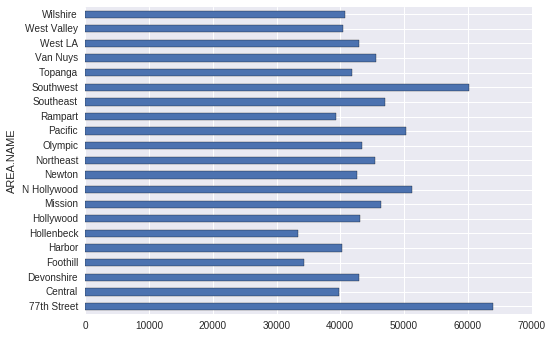

In [6]:
data["AREA.NAME"].groupby(data["AREA.NAME"]).count().plot(kind="barh")

77th Street Area is having highest crime rate in Los Angeles. 

What makes it more interesting is, the place I stay, "Southwest", stands for the 2nd highest in crime rate. Lets explore more for Southwest and discover interesting patterns.

In [7]:
Southwest = data.set_index(['AREA.NAME']).loc['Southwest']
Southwest.head(5)

,Date.Rptd,DR.NO,AREA,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,ArrestDateTime
AREA.NAME,,,,,,,,,,,,
Southwest,08/19/2014,140318169,3,319,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,FIGUEROA,12TH,"(34.0419, -118.2669)",08/22/2014 14:30
Southwest,08/06/2014,140317124,3,331,950,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400",IC,Invest Cont,4700 W ADAMS BL,NaN,"(34.0325, -118.3506)",08/06/2014 16:00
Southwest,07/29/2014,140316678,3,356,930,"THREATS, VERBAL/TERRORIST",IC,Invest Cont,1600 W 36TH ST,NaN,"(34.0228, -118.306)",07/30/2014 14:00
Southwest,01/22/2014,140305240,3,392,997,TRAFFIC DR #,IC,Invest Cont,11TH AV,50TH ST,"(33.9964, -118.3294)",01/22/2014 10:20
Southwest,07/16/2014,140315935,3,376,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,3900 HALLDALE AV,NaN,"(34.0155, -118.3023)",07/18/2014 08:00


Lets find the count and type of crime in Southwest of Los Angeles from 2013-2015

In [8]:
Southwest.groupby('AREA').size()
pd.set_option('display.height', 1000)

AREA
3    60191
dtype: int64

In [9]:
Southwest.groupby('CrmCd.Desc').size().sort_values(ascending=False)

CrmCd.Desc
TRAFFIC DR #                                                9643
BATTERY - SIMPLE ASSAULT                                    6238
THEFT PLAIN - PETTY ($950 & UNDER)                          4066
BURGLARY                                                    3392
VEHICLE - STOLEN                                            3341
BURGLARY FROM VEHICLE                                       2887
ROBBERY                                                     2637
SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT                       2554
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              2539
THEFT OF IDENTITY                                           2527
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    1748
THEFT PLAIN - PETTY (UNDER $400)                            1619
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     1598
CRIMINAL THREATS - NO WEAPON DISPLAYED                      1430
THEFT FROM MOTOR VEHICLE - PETTY ($950.01 & OVER)           1186
SHOPLIFTING - 

Out of 60,191 crimes in the last 3 years in Southwest, Traffic DR# and 'Battery - Simple Assault' are the most reported crimes.

Number of incidents reported to LAPD for Bike stolen is 280, which is very less! 


In [10]:
Southwest.groupby('CrmCd.Desc').size().sort_values(ascending=False).head(20)

CrmCd.Desc
TRAFFIC DR #                                                9643
BATTERY - SIMPLE ASSAULT                                    6238
THEFT PLAIN - PETTY ($950 & UNDER)                          4066
BURGLARY                                                    3392
VEHICLE - STOLEN                                            3341
BURGLARY FROM VEHICLE                                       2887
ROBBERY                                                     2637
SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT                       2554
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              2539
THEFT OF IDENTITY                                           2527
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    1748
THEFT PLAIN - PETTY (UNDER $400)                            1619
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     1598
CRIMINAL THREATS - NO WEAPON DISPLAYED                      1430
THEFT FROM MOTOR VEHICLE - PETTY ($950.01 & OVER)           1186
SHOPLIFTING - 

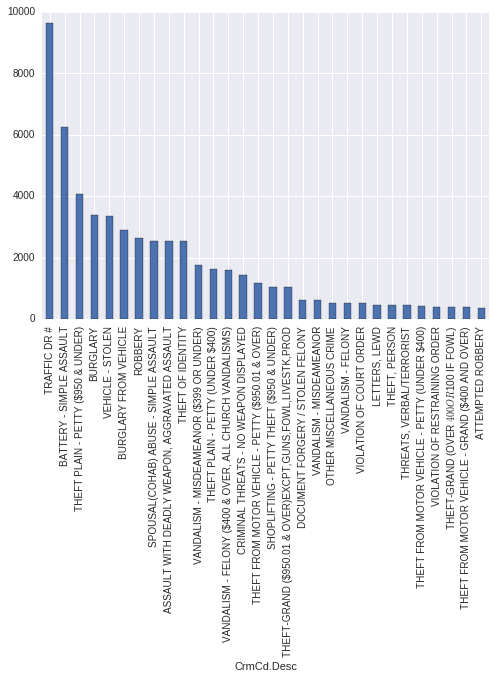

In [11]:
Southwest.groupby('CrmCd.Desc').size().sort_values(ascending=False).head(30).plot(kind="bar")

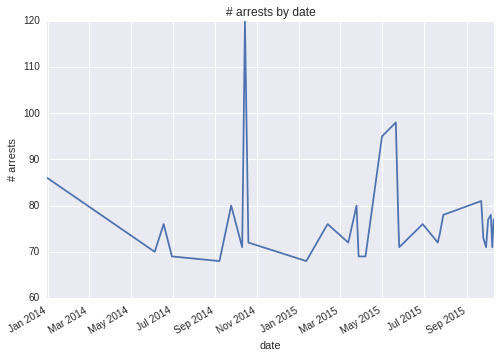

In [73]:
(Southwest
        .groupby('Date.Rptd')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(title="# arrests by date")
        .set(xlabel = "date",ylabel = "# arrests")
)

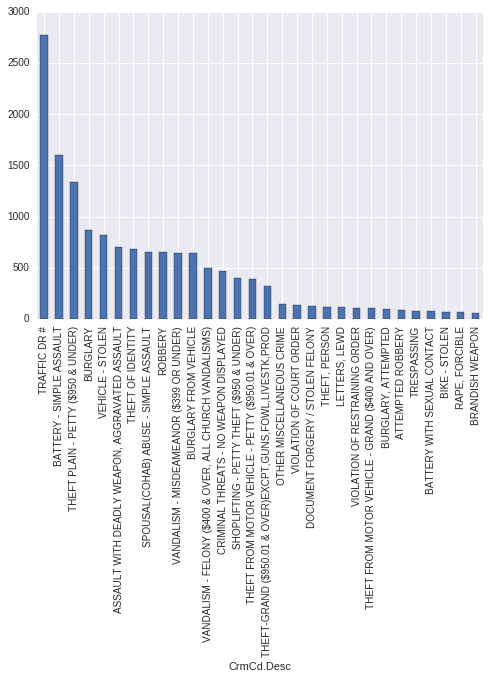

In [38]:
(Southwest[(Southwest['Date.Rptd']>="2014-01-01") & 
          (Southwest['Date.Rptd']<"2015-01-01")] 
        .groupby('CrmCd.Desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

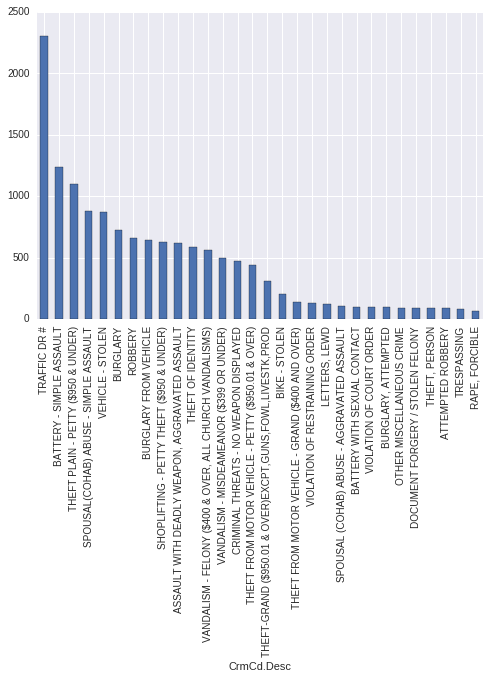

In [39]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
        .groupby('CrmCd.Desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

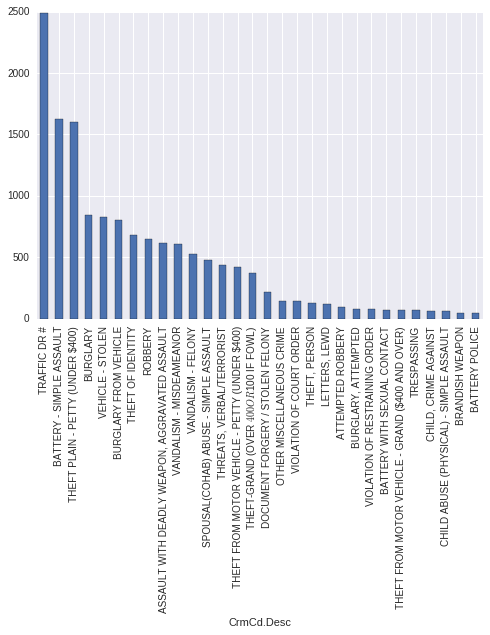

In [40]:
(Southwest[(Southwest['Date.Rptd']>="2013-01-01") & 
          (Southwest['Date.Rptd']<"2014-01-01")] 
        .groupby('CrmCd.Desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

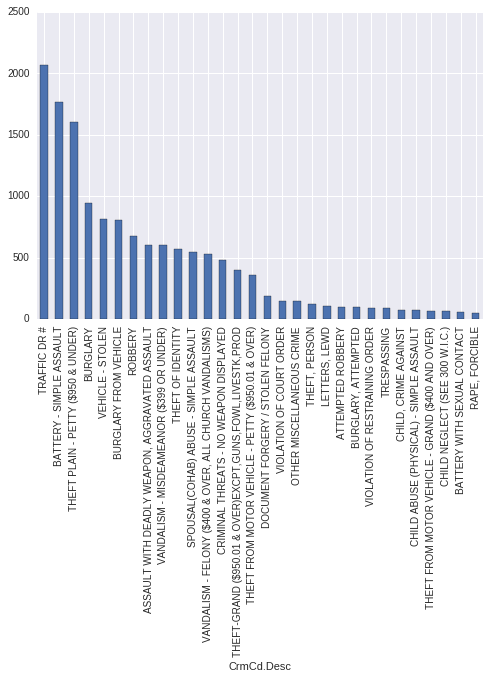

In [41]:
(Southwest[(Southwest['Date.Rptd']>="2012-01-01") & 
          (Southwest['Date.Rptd']<"2013-01-01")] 
        .groupby('CrmCd.Desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

In [53]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
         .groupby(["CrmCd.Desc"])         
         .agg({'CrmCd.Desc':numpy.size})
         .sort_values(["CrmCd.Desc"],ascending=False)
         
)

,CrmCd.Desc
CrmCd.Desc,
TRAFFIC DR #,2307
BATTERY - SIMPLE ASSAULT,1239
THEFT PLAIN - PETTY ($950 & UNDER),1102
SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,878
VEHICLE - STOLEN,874
BURGLARY,724
ROBBERY,659
BURGLARY FROM VEHICLE,641
SHOPLIFTING - PETTY THEFT ($950 & UNDER),630


In [59]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
         .groupby(["Status.Desc"])         
         .agg({'Status.Desc':numpy.size})
         .sort_values(["Status.Desc"],ascending=False)
         
)

,Status.Desc
Status.Desc,
Invest Cont,12398
Adult Other,1294
Adult Arrest,899
Juv Arrest,134
Juv Other,29


In [62]:
(Southwest[(Southwest['Date.Rptd']>="2015-01-01") & 
          (Southwest['Date.Rptd']<"2016-01-01")] 
         .groupby(["LOCATION"])         
         .agg({'LOCATION':numpy.size})
         .sort_values(["LOCATION"],ascending=False)
         
)

,LOCATION
LOCATION,
4100 CRENSHAW BL,256
MARTIN LUTHER KING JR BL,203
CRENSHAW BL,187
4000 CRENSHAW BL,170
3500 S LA CIENEGA BL,154
JEFFERSON BL,143
ADAMS BL,134
WESTERN AV,120
VERMONT AV,103


ERROR! Session/line number was not unique in database. History logging moved to new session 33


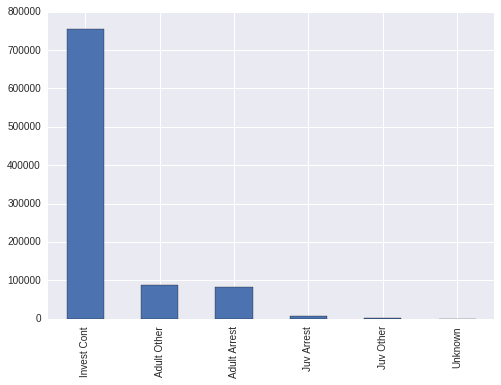

In [8]:
data["Status.Desc"].value_counts().plot(kind="bar")    

In [63]:
Southwest.head()

,Date.Rptd,DR.NO,AREA,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,ArrestDateTime
AREA.NAME,,,,,,,,,,,,
Southwest,2014-08-19,140318169,3,319,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,FIGUEROA,12TH,"(34.0419, -118.2669)",08/22/2014 14:30
Southwest,2014-08-06,140317124,3,331,950,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400",IC,Invest Cont,4700 W ADAMS BL,NaN,"(34.0325, -118.3506)",08/06/2014 16:00
Southwest,2014-07-29,140316678,3,356,930,"THREATS, VERBAL/TERRORIST",IC,Invest Cont,1600 W 36TH ST,NaN,"(34.0228, -118.306)",07/30/2014 14:00
Southwest,2014-01-22,140305240,3,392,997,TRAFFIC DR #,IC,Invest Cont,11TH AV,50TH ST,"(33.9964, -118.3294)",01/22/2014 10:20
Southwest,2014-07-16,140315935,3,376,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,3900 HALLDALE AV,NaN,"(34.0155, -118.3023)",07/18/2014 08:00
